### The results are stored in the .pkl located in the wandb run directory. We need to undump this to look into the individual entropies of each semantic class

In [2]:
# Fill in the wandb_id assigned to your demo run!

wandb_id = 'd01zakoy'
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')

In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Helper Functions
def restore_file(wandb_id, filename='wandb-summary.json'):
    files_dir = 'notebooks/restored_files'    
    os.system(f'mkdir -p {files_dir}')

    api = wandb.Api()
    run = api.run(f'semantic_uncertainty/{wandb_id}')

    path = f'{files_dir}/{filename}'
    os.system(f'rm -rf {path}')
    run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
    with open(path, 'r') as f:
        out = json.load(f)
    return out

### come back and implement this later. For now, manually download uncertainty_measures.pkl from the wandb run instance and dissect it.

In [3]:
results = restore_file(wandb_id, 'uncertainty_measures.pkl')

NameError: name 'restore_file' is not defined

In [10]:
import pickle
import os

# Load all pkl files in the directory into a dictionary
data = {}
directory = 'uncertainty_measures_pkl'
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        label = filename[:-4]  # Remove the '.pkl' extension
        with open(os.path.join(directory, filename), 'rb') as file:
            data[label] = pickle.load(file)

# Print the loaded dictionary
print(type(data))

<class 'dict'>


In [11]:
# len(data['uncertainty_measures']['semantic_entropy'])
# len(data['semantic_ids'])

len(data), data.keys()

(7,
 dict_keys(['mistral_deberta_t1', 'bitext_llama_t0.5', 'bitext_llama_t1', 'mistral_llama_t1', 'mistral_llama_t0.1', 'bitext_llama_t0.1', 'mistral_llama_t0.5']))

### For some reason, we see only 399 entropies, while there were 400 data points sampled. Where is the missing one? Check with other pkl files too.

## Do math. Analyze the semantic entropies:

,mistral_deberta_t1,bitext_llama_t0.5,bitext_llama_t1,mistral_llama_t1,mistral_llama_t0.1,bitext_llama_t0.1,mistral_llama_t0.5
0,2.001636,6.001532e-01,0.676821,-2.220446e-16,-2.220446e-16,-2.220446e-16,2.220446e-16
1,0.441066,-0.000000e+00,0.621732,-0.000000e+00,2.220446e-16,-2.220446e-16,2.220446e-16
2,1.473618,-0.000000e+00,-0.000000,6.631616e-01,-0.000000e+00,-0.000000e+00,-2.220446e-16
3,1.232109,-0.000000e+00,0.693094,-2.220446e-16,-2.220446e-16,-0.000000e+00,-2.220446e-16
4,2.103970,-2.220446e-16,0.816137,1.344225e+00,-2.220446e-16,-4.440892e-16,-0.000000e+00


mistral_deberta_t1    1.534642
bitext_llama_t0.5     0.445998
bitext_llama_t1       0.634166
mistral_llama_t1      0.486200
mistral_llama_t0.1    0.177421
bitext_llama_t0.1     0.194381
mistral_llama_t0.5    0.353613
dtype: float64

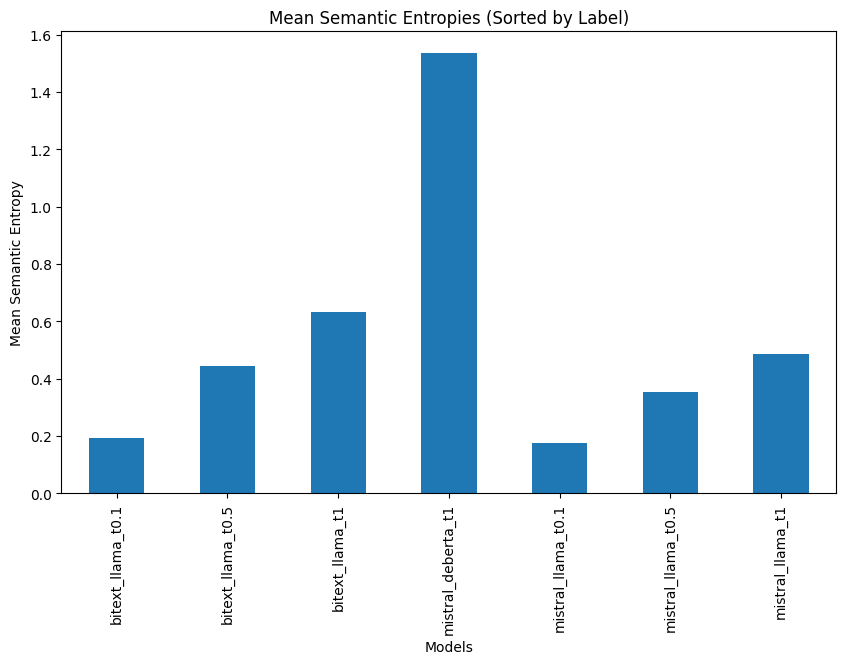

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# compute mean SE
semantic_entropies = dict()
for key, value in data.items():
    semantic_entropies[key] = value['uncertainty_measures']['semantic_entropy']
semantic_entropies = pd.DataFrame(semantic_entropies)

display(semantic_entropies.head())
means = semantic_entropies.mean()
display(means)

means.sort_index().plot(kind='bar', figsize=(10, 6), title='Mean Semantic Entropies (Sorted by Label)')
plt.xlabel('Models')
plt.ylabel('Mean Semantic Entropy')
plt.show()

In [13]:
negative_counts = (semantic_entropies < 0).sum()
print(negative_counts)

ranges = semantic_entropies.apply(lambda col: (col.min(), col.max()))
display(ranges)

semantic_entropies[semantic_entropies < 0] = 0
negative_counts = (semantic_entropies < 0).sum()
print(negative_counts)

mistral_deberta_t1      6
bitext_llama_t0.5      64
bitext_llama_t1        38
mistral_llama_t1       72
mistral_llama_t0.1    130
bitext_llama_t0.1     104
mistral_llama_t0.5    109
dtype: int64


,mistral_deberta_t1,bitext_llama_t0.5,bitext_llama_t1,mistral_llama_t1,mistral_llama_t0.1,bitext_llama_t0.1,mistral_llama_t0.5
0,-4.440892e-16,-4.440892e-16,-4.440892e-16,-4.440892e-16,-4.440892e-16,-4.440892e-16,-4.440892e-16
1,2.296711e+00,2.166023e+00,2.284651e+00,2.290657e+00,2.302585e+00,2.302585e+00,2.300382e+00


mistral_deberta_t1    0
bitext_llama_t0.5     0
bitext_llama_t1       0
mistral_llama_t1      0
mistral_llama_t0.1    0
bitext_llama_t0.1     0
mistral_llama_t0.5    0
dtype: int64


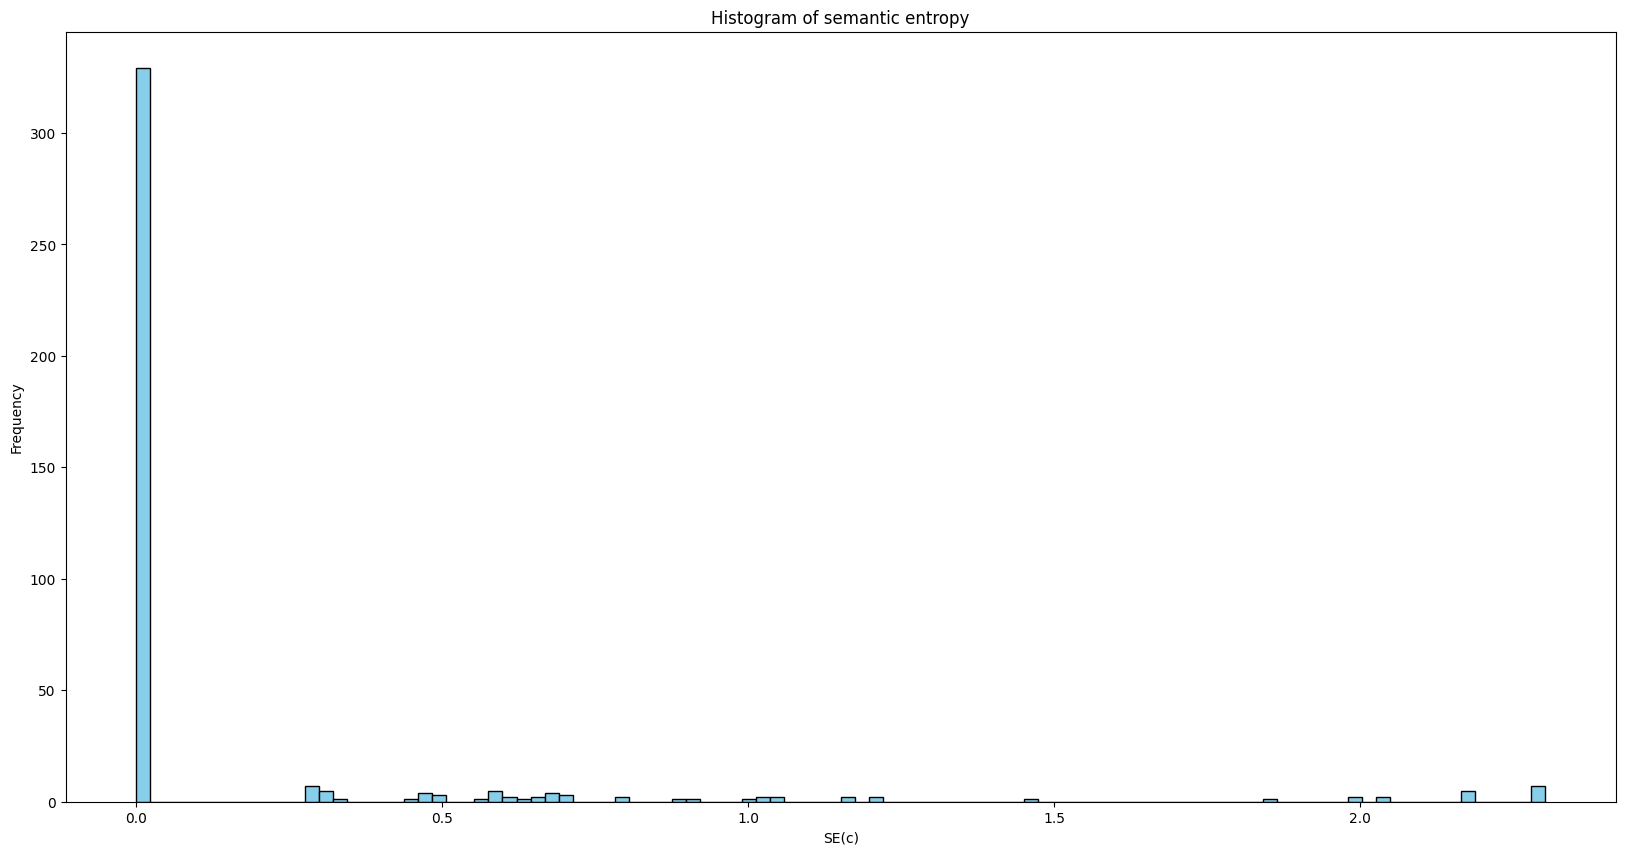

In [8]:
# histogram of semantic entropy
plt.figure(figsize=(20, 10))


plt.hist(semantic_entropies['mistral_llama_t0.1'], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of semantic entropy')
plt.xlabel('SE(c)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

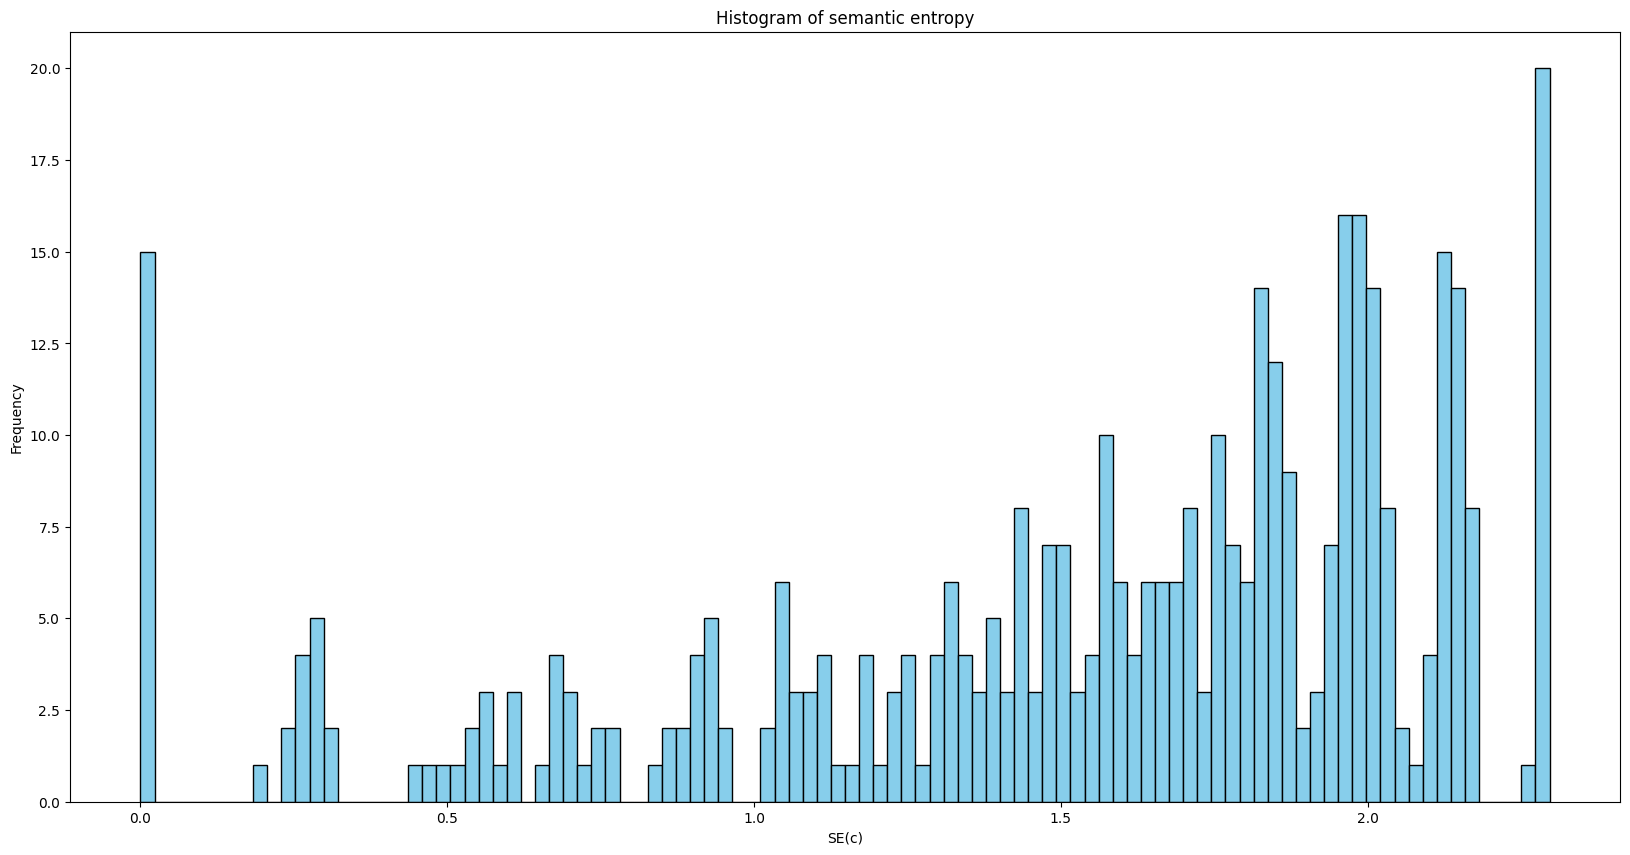

In [14]:
# histogram of semantic entropy
plt.figure(figsize=(20, 10))


plt.hist(semantic_entropies['mistral_deberta_t1'], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of semantic entropy')
plt.xlabel('SE(c)')
plt.ylabel('Frequency')

# Display the plot
plt.show()